In [48]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt

Pasos: 100.0
Ángulo: 15.4 ± 0.2 grados
Relación grados/paso: 0.154 ± 0.002 grados/paso

Pasos: 50.0
Ángulo: 6.6 ± 0.2 grados
Relación grados/paso: 0.132 ± 0.003 grados/paso

Pasos: 25.0
Ángulo: 4.3 ± 0.1 grados
Relación grados/paso: 0.171 ± 0.006 grados/paso



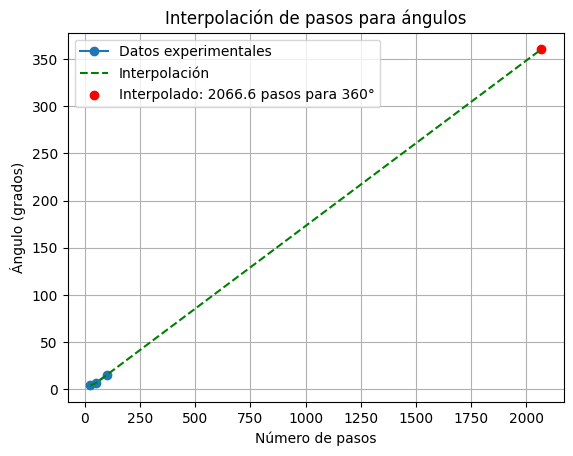

Pasos necesarios para un giro de 360 grados (interpolación): 2066.6 pasos
Relación grados/paso: 0.2 grados/paso


In [49]:
# Datos del experimento
dic_datos = {
    'pasos': [100, 50, 25], 
    'distancia_pantalla_cm': [11.4, 4.8, 3.1],
    'distancia_pared_cm': [41.5] * 3,
    'resolucion_regla_cm': [0.1] * 3  # Incertidumbre en la medición
}

datos_df = pd.DataFrame(dic_datos)

# Distancias a metros
datos_df['distancia_pantalla_m'] = datos_df['distancia_pantalla_cm'] / 100
datos_df['distancia_pared_m'] = datos_df['distancia_pared_cm'] / 100

# Cálculo de los ángulos en radianes usando trigonometría
datos_df['angulo_radianes'] = np.arctan(datos_df['distancia_pantalla_m'] / datos_df['distancia_pared_m'])
datos_df['angulo_grados'] = np.degrees(datos_df['angulo_radianes'])

# Relación grados/paso
datos_df['grados_por_paso'] = datos_df['angulo_grados'] / datos_df['pasos']

### Calculo de la incertidumbre en los ángulos usando la propagación de errores ###

# Derivadas parciales de la función arctan
d_theta_d_pantalla = (1 / (1 + (datos_df['distancia_pantalla_m'] / datos_df['distancia_pared_m'])**2)) / datos_df['distancia_pared_m']
d_theta_d_pared = -(datos_df['distancia_pantalla_m'] / ((datos_df['distancia_pared_m']**2) * (1 + (datos_df['distancia_pantalla_m'] / datos_df['distancia_pared_m'])**2)))

# Incertidumbre en la distancia de la pantalla y de la pared (en metros)
incertidumbre_pantalla_m = datos_df['resolucion_regla_cm'] / 100
incertidumbre_pared_m = datos_df['resolucion_regla_cm'] / 100

# Propagación de la incertidumbre para el ángulo en radianes
datos_df['incertidumbre_angulo_radianes'] = np.abs(d_theta_d_pantalla) * incertidumbre_pantalla_m + np.abs(d_theta_d_pared) * incertidumbre_pared_m

# Convertir la incertidumbre de radianes a grados
datos_df['incertidumbre_angulo_grados'] = np.degrees(datos_df['incertidumbre_angulo_radianes'])

### Ahora propagamos el error a la relación grados/paso ###
datos_df['incertidumbre_grados_por_paso'] = datos_df['incertidumbre_angulo_grados'] / datos_df['pasos']

# Mostrar los resultados con incertidumbres redondeadas a 1 decimal
for i, row in datos_df.iterrows():
    angulo = round(row['angulo_grados'], 1)
    inc_angulo = round(row['incertidumbre_angulo_grados'], 1)
    grados_por_paso = round(row['grados_por_paso'], 3)
    inc_grados_por_paso = round(row['incertidumbre_grados_por_paso'], 3)
    
    print(f"Pasos: {row['pasos']}")
    print(f"Ángulo: {angulo} ± {inc_angulo} grados")
    print(f"Relación grados/paso: {grados_por_paso} ± {inc_grados_por_paso} grados/paso")
    print()

### Interpolación para encontrar el número de pasos para 360 grados ###

# Creamos la función de interpolación con scipy
f_interpol = interpolate.interp1d(datos_df['angulo_grados'], datos_df['pasos'], fill_value="extrapolate")

# Usamos la función para calcular el número de pasos cuando el ángulo es 360 grados
pasos_360 = f_interpol(360)

# Crear un rango de ángulos para la línea de interpolación
angulo_rango = np.linspace(datos_df['angulo_grados'].min(), 360, 500)
pasos_interpolados = f_interpol(angulo_rango)

# Graficamos los datos originales
plt.plot(datos_df['pasos'], datos_df['angulo_grados'], 'o-', label='Datos experimentales')

# Graficamos la línea de interpolación
plt.plot(pasos_interpolados, angulo_rango, '--', label='Interpolación', color='green')

# Graficamos el punto interpolado
plt.scatter(pasos_360, 360, color='red', label=f'Interpolado: {pasos_360:.1f} pasos para 360°')

plt.xlabel('Número de pasos')
plt.ylabel('Ángulo (grados)')
plt.legend()
plt.grid(True)
plt.title('Interpolación de pasos para ángulos')
plt.show()

# Valor interpolado redondeado
pasos_360 = round(float(pasos_360), 1)
print(f"Pasos necesarios para un giro de 360 grados (interpolación): {pasos_360} pasos")

### Cálculo de la relación grados/paso para 360 grados ###
relacion_grados_por_paso = 360 / pasos_360

# Relación grados/paso
relacion_grados_por_paso = round(relacion_grados_por_paso, 1)
print(f"Relación grados/paso: {relacion_grados_por_paso} grados/paso")